# MODULE 2 Data Exploration

In [7]:
# NOTES
# What type of machine learning problem are we solving?
#    - supervised learning because we have labeled training data
#    - Classification or regression?
# Is it bad practice to explore the y_train dataset?

# STEPS we've taken / explored

#   x_train.info() to explore dimensions, and look at data types
#   x_train.describe() to see basic statistics of dataset
#   histogram on each numerical feature
#   correlation matrix on each x_train feature to explore linear correlations between features

#   TO DO: categorical features ???
#   TO DO: feature scaling ???
#   TO DO: What to do if I find relationships between features ??? options ??? do anything ???

#   TO DO: how to deal with NaN values ???
#   Column B15 contains "?"
#   TO DO: check subtleties within each grouped features
#   TO DO: scatterplots

In [2]:
# initializations
import os
import pandas as pd
from category_encoders.one_hot import OneHotEncoder
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import itertools

In [3]:
# training data import
os.chdir("C:\\Users\\LYC\\Desktop\\SFU\\Fall 2020 Courses\\STAT 440\\Module 2")

x_train = pd.read_csv("Xtrain.txt", delimiter = ' ')
y_train = pd.read_csv("Ytrain.txt", delimiter = ' ')
x_test = pd.read_csv("Xtest.txt", delimiter = ' ')
y_test = pd.read_csv("Ytest.txt", delimiter = ',')

C:\Users\LYC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#configure how much dataset we see
pd.set_option("display.max.columns", None)
pd.set_option("display.min_rows",50)

In [1]:
# take a look at all the dataypes, and which features contain NaN values
x_train.info() ;

NameError: name 'x_train' is not defined

In [12]:
y_train

,Id,Z01,Z02,Z03,Z04,Z05,Z06,Z07,Z08,Z09,Z10,Z11,Z12,Z13,Z14
0,2,0.000804,1.0,-0.690854,-0.097983,1.596819,2.811465,-0.288238,-1.332324,0.525250,0.331350,-0.009761,0.864470,0.776477,54.487331
1,3,0.073445,0.0,2.779953,-0.003554,1.306106,-0.538724,-1.943584,NaN,0.222504,-0.047518,0.063107,0.766641,0.624055,63.351648
2,4,0.042891,1.0,0.273351,0.030700,-1.537983,-0.083806,0.843982,-0.298859,0.039860,-0.048459,-0.031156,0.357999,0.657927,27.984377
3,5,0.118081,1.0,-0.332309,-0.046811,-0.174755,-0.192151,0.014280,0.932137,0.221353,-0.024971,0.056017,0.711032,0.137043,31.723970
4,7,0.842596,1.0,-0.063383,-0.032474,-1.999459,-1.372546,0.229115,-0.070465,0.226894,0.034162,-0.034993,0.231087,0.957418,20.746050
5,8,0.367297,0.0,-1.238635,-0.064780,0.896545,-0.973432,0.379365,0.935167,0.532949,0.026242,0.016690,0.792217,0.239816,36.533898
6,10,0.133781,1.0,-0.102431,-0.009133,-0.617142,0.311463,2.419557,0.108638,0.809060,0.034442,-0.001127,0.285799,0.262083,18.745809
7,11,0.013877,0.0,-1.396155,0.066922,0.599314,0.515787,0.838372,-1.154509,0.602777,-0.007865,0.002008,0.471177,0.582526,17.046346
8,14,0.155590,0.0,1.881012,-0.032990,0.595721,-0.690990,-0.066000,-1.250734,0.757116,0.052225,0.019626,0.700588,0.131894,53.995128
9,16,0.134808,1.0,-0.523391,0.001755,-0.459125,-0.737672,1.248194,-1.000844,0.449327,0.001409,0.005596,0.481395,0.131130,40.701306


In [276]:
#look at unique values in a given feature
x_train["B15"].unique()


array([nan, '-0.971939', '1.49232', ..., 0.320256, -1.74747,
       -0.12030199999999999], dtype=object)

In [13]:
y_train['Z02'].value_counts()

1.0    76638
0.0    76503
7.0      146
Name: Z02, dtype: int64

In [6]:
# basic statistics on the dataset
y_train.describe()

,Id,Z01,Z02,Z03,Z04,Z05,Z06,Z07,Z08,Z09,Z10,Z11,Z12,Z13,Z14
count,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,137988.000000,137988.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000
mean,101621.178932,0.507233,0.506631,0.006196,-0.035187,0.018779,0.006704,-0.034600,-0.027425,0.505675,0.069227,-0.005398,0.506784,0.507092,40.914904
std,58729.768808,0.351790,0.538481,1.022424,0.227494,1.003374,1.021567,1.196610,1.187343,0.351059,0.231928,0.222679,0.351283,0.351472,10.656328
min,2.000000,0.000008,0.000000,-3.793578,-0.414208,-1.999995,-3.439353,-9.000000,-9.000000,0.000004,-0.242476,-0.264622,0.000002,0.000012,0.000000
25%,50691.000000,0.250767,0.000000,-0.771079,-0.084203,-0.674473,-0.741225,-0.685095,-0.674674,0.250674,0.001247,-0.047561,0.250681,0.250987,33.841098
50%,101550.000000,0.502392,1.000000,-0.105990,-0.038433,0.007735,0.000295,-0.002090,-0.000015,0.498625,0.054056,-0.011485,0.501403,0.502341,39.624639
75%,152570.500000,0.751869,1.000000,0.564507,0.004501,0.683391,0.746633,0.677282,0.679020,0.749895,0.113464,0.023914,0.750530,0.751886,46.334497
max,203287.000000,7.000000,7.000000,7.000000,7.000000,7.009968,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,99.900000


In [100]:
column_names = np.array(x_train.columns)

In [105]:
column_names

array(['Id', 'A01', 'A02', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06',
       'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15',
       'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24',
       'C01', 'C02', 'C03', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06',
       'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15',
       'D16', 'D17', 'E01', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06',
       'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'G01', 'G02', 'G03',
       'outlier_7'], dtype=object)

In [ ]:
# Feature inter-relations notes
#
# B18 & B21 are related (looks like bell curve, truncated on the left)
# A01, 02, B01-08 (looks like bell curve, narrower dispersion)
# B09-14, B16-17, B19-20, B22-24, D12 (looks like bell curve, wider dispersion)
# There is no B15 because it's an "object" datatype, need to clean the question marks, and turn back into numeric
# C01-03, D01-11 (looks like bell curve, very very narrow dispersion) !!!! THERE ARE SOME SUBTLE DIFFERENCES !!!
# D13-17, E01, F01-02 (looks like two uniform distributions)
# F03-05 (discrete values, -7 to 7)
# F06-09, F12, F10 ??? by itself or group with F06-09 (looks like two bell curves very close together? or one bell curve with a lot more cencentration in the middle)
# F11 (not sure what to think of this distribution)
# G01-03 (discrete values, 0,1,7)

# 7s are for entire rows! check: x_train[x_train["G01"] == 7]
# For B18 and B21, max is not exactly 7, we should look into it, either change them to 7 or there is some other meaning
# Some features max = 7 results show different row numbers. EG: x_train[x_train["B07"] == 7] vs B04 vs B05

# 
# 
# 
# 
# 
# 

In [ ]:
%matplotlib inline

# x_train["C01"].hist(bins=1000, figsize = (28,22))
# x_train["C02"].hist(bins=1000, figsize = (28,22))
# x_train["C03"].hist(bins=1000, figsize = (28,22))
x_train["D01"].hist(bins=1000, figsize = (28,22))
x_train["D02"].hist(bins=1000, figsize = (28,22))
x_train["D03"].hist(bins=1000, figsize = (28,22))
x_train["D04"].hist(bins=1000, figsize = (28,22))

plt.show()

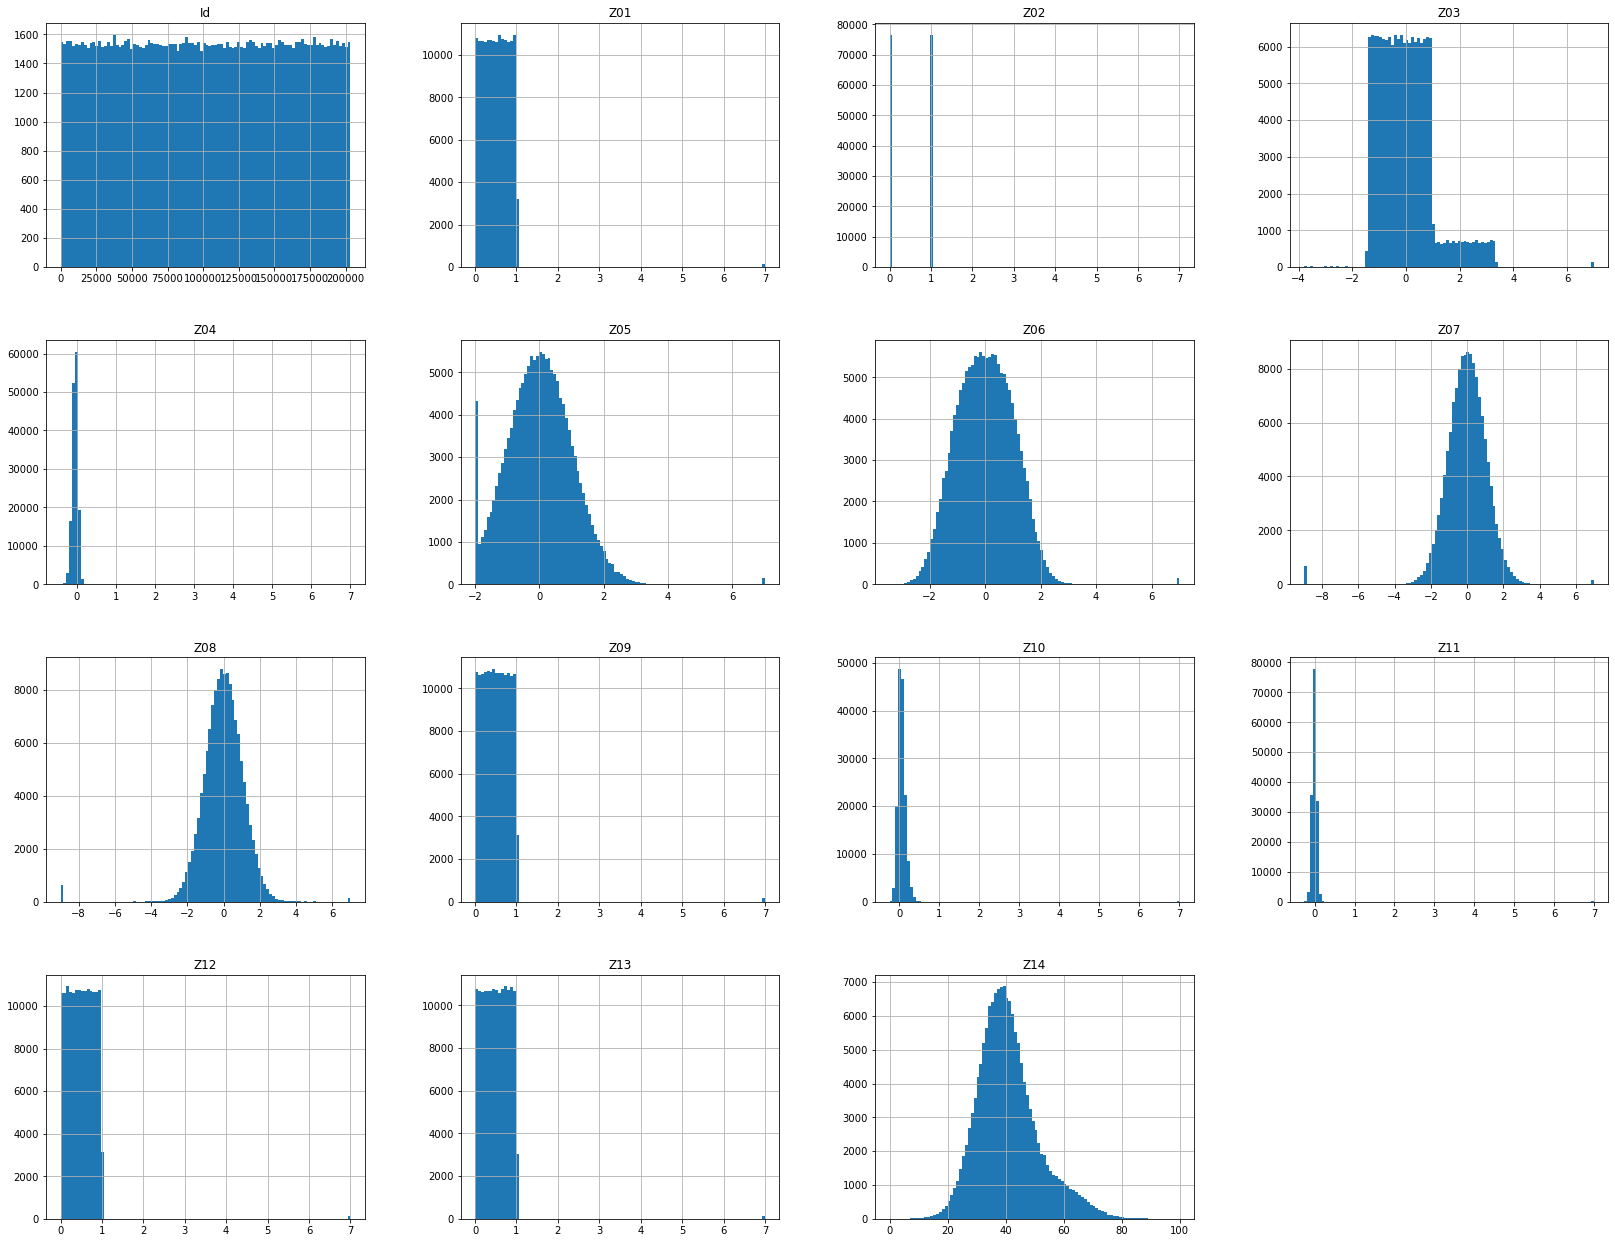

In [11]:
%matplotlib inline

y_train.hist(bins=100, figsize = (28,22))
plt.show()

In [ ]:
# %matplotlib inline

# y_train.hist(bins=25, figsize = (28,22))
# plt.show()

In [ ]:
# %matplotlib inline

# x_test.hist(bins=25, figsize = (28,22))
# plt.show()

In [ ]:
exploration = x_train.copy()

In [ ]:
corr_matrix = exploration.corr()

corr_matrix["D14"].sort_values(ascending = False)

In [ ]:
y_train

In [ ]:
y_train.info()

In [ ]:
y_train.describe()

In [4]:
y_train[y_train["Z14"] == 7]

NameError: name 'y_train' is not defined

In [ ]:
y_train["Z14"].unique()

In [ ]:
y_train['Z14'].value_counts();

In [ ]:
# Y_train dependent variables exploration notes

# Z01,09,12,13 (same distribution as D13-17, E01, F01-02 in X_train)
# Z02 (discrete values, 0/1/7)
# Z03 (same distribution as F11 in X_train)
# Z04 & Z11 (same distribution as C01-03, D01-11 in X_train)
# Z05 (same distribution as B18 & B21 in X_train)
# Z06 (same distribution as B09-14, B16-17, B19-20, B22-24, D12 in X_train)
# Z07 & Z08 (same distribution as A01, 02, B01-08 in X_train)
# Z10 (which distribution ???)
# Z14 (unlike any X_train distributions ???) (also, instead of 7 count=146, it is 50.175170 count=146)

In [ ]:
%matplotlib inline

y_train["Z14"].hist(bins=100, figsize = (28,22))
# y_train["Z10"].hist(bins=1000, figsize = (28,22))


plt.show()

In [ ]:
%matplotlib inline

y_train.hist(bins=50, figsize = (28,22))
plt.show()

In [ ]:
y_train.describe()

In [189]:
for i in Id_negative_9s:
    x_train.loc[x_train["Id"] == i, "outlier_-9"] = 1

# Start pre-processing

In [ ]:
# initializations
import os
import pandas as pd
import numpy as np

In [ ]:
# Load original dataset
os.chdir("C:\\Users\\LYC\\Desktop\\SFU\\Fall 2020 Courses\\STAT 440\\Module 2")

x_train = pd.read_csv("Xtrain.txt", delimiter = ' ')
y_train = pd.read_csv("Ytrain.txt", delimiter = ' ')
x_test = pd.read_csv("Xtest.txt", delimiter = ' ')
y_test = pd.read_csv("Ytest.txt", delimiter = ',')

In [467]:
Id_x_train = x_train["Id"]
Id_x_test = x_test["Id"]

x = pd.concat([x_train,x_test],axis=0)

In [468]:
def preprocessing(df):
    
    Id = df["Id"]

    df = df.replace("?",np.NaN)
    df["B15"] = pd.to_numeric(df["B15"])
    column_names = np.array(df.columns)
   
    max_7s = np.array([])
    
    for i in range(len(column_names)):
        df_7 = df.loc[df[column_names[i]] == 7]
        max_7s = np.append(max_7s, df_7["Id"])
        
    Id_max_7s = np.unique(max_7s)
    
    for i in Id_max_7s:
        df.loc[df["Id"] == i,"outlier_7"] = 1
        
    df['outlier_7'] = df['outlier_7'].fillna(0)
    
    df = df.drop(['Id'], axis=1)
    
    df = df.replace(7, np.NaN)
    
    df = pd.concat([Id,df],axis=1)
    
    negative_9s = np.array([])
    
    for i in range(len(column_names)):
        df_9 = df.loc[df[column_names[i]] == -9]
        negative_9s = np.append(negative_9s, df_9["Id"])
        
    Id_negative_9s = np.unique(negative_9s)
    
    for i in Id_negative_9s:
        df.loc[df["Id"] == i,"outlier_neg_9"] = 1
        
    df['outlier_neg_9'] = df['outlier_neg_9'].fillna(0)
    
    df = df.replace(-9,np.NaN)
    
    
    
    F03_values = df["F03"].unique()
    F03_values = F03_values[np.logical_not(np.isnan(F03_values))]

    F04_values = df["F04"].unique()
    F04_values = F04_values[np.logical_not(np.isnan(F04_values))]

    F05_values = df["F05"].unique()
    F05_values = F05_values[np.logical_not(np.isnan(F05_values))]

    G01_values = df["G01"].unique()
    G01_values = G01_values[np.logical_not(np.isnan(G01_values))]

    G02_values = df["G02"].unique()
    G02_values = G02_values[np.logical_not(np.isnan(G02_values))]

    G03_values = df["G03"].unique()
    G03_values = G03_values[np.logical_not(np.isnan(G03_values))]
    
    
    df['F03'] = df['F03'].fillna(pd.Series(np.random.choice(F03_values, size=len(df.index))))
    df['F04'] = df['F04'].fillna(pd.Series(np.random.choice(F04_values, size=len(df.index))))
    df['F05'] = df['F05'].fillna(pd.Series(np.random.choice(F05_values, size=len(df.index))))
    df['G01'] = df['G01'].fillna(pd.Series(np.random.choice(G01_values, size=len(df.index))))
    df['G02'] = df['G02'].fillna(pd.Series(np.random.choice(G02_values, size=len(df.index))))
    df['G03'] = df['G03'].fillna(pd.Series(np.random.choice(G03_values, size=len(df.index))))
    
    df.fillna(value=df.mean(), inplace=True)
    
    return(df)

In [469]:
x = preprocessing(x)

In [476]:
Id_x_train = np.array(Id_x_train)
Id_x_test = np.array(Id_x_test)

In [481]:
x_train = x.loc[x['Id'].isin(Id_x_train)]

In [483]:
x_test = x.loc[x['Id'].isin(Id_x_test)]